In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
exchange_name = 'binance'

market_type = 'spot'
# Set coins as base
# base_coin = ['BTC-USDT', 'ETH-USDT', 'XRP-USDT', 'AVAX-USDT', 'FTM-USDT', 'SOL-USDT', 'BNB-USDT',
#                    'GALA-USDT', 'DOGE-USDT', 'SHIB-USDT', 'NEAR-USDT', 'ADA-USDT', 'DOT-USDT', 'MATIC-USDT',
#                    'LINK-USDT', 'SAND-USDT', 'LTC-USDT', 'MANA-USDT', 'GRT-USDT','ONE-USDT', 'FIL-USDT',
#                    'ETC-USDT', 'BCH-USDT', 'CRV-USDT']
base_coin = ['BTC-USDT']
# set time span
# timeperiod = ['1day', '1hour', '4hour']
timeperiod = ['5min']
# set timeperiod
test_time = ['2018/01/01 08:00:00', '2022/12/07 08:00:00']

# set time interval
test_interval_list = [30]
# test_interval_list = [30,90]
na_dic = {30: '30days', 90: '90days'}

# test correlation for base coin
for coin in base_coin:
    for tim in timeperiod:
        print(f'{coin}_{tim} is undergoing')
        coin_data_root = f"./data/{exchange_name}_data/{market_type}_data"
        index_data_root = coin_data_root
        index_list = os.listdir(index_data_root)
        # ----------------------------------------------------------------------------
        base_file = coin + '(' + tim + ').csv'
        alldf = pd.DataFrame(pd.read_csv(f"{coin_data_root}/{coin}/{base_file}", names=['datetime', coin+'_o', coin+'_h', coin+'_l', coin+'_c', coin+'_v']))
        s = pd.to_datetime(test_time[0])
        e = pd.to_datetime(test_time[1])
        alldf['datetime'] = pd.to_datetime(alldf['datetime'])
        alldf = alldf.loc[(alldf.datetime >= s) & (alldf.datetime <= e)]
        alldf = alldf.reset_index()
        alldf.drop(['index'], axis=1, inplace=True)

        def atr_percent(arrLike):
            o = arrLike[coin+'_o']
            c = arrLike[coin+'_c']
            result = (c - o) / o
            return result
        
        alldf[coin+tim] = alldf.apply(atr_percent, axis=1)
        alldf = alldf[['datetime', coin+tim]]
        all_symbol_list = index_list
        all_symbol_list = [x for x in all_symbol_list if not '.' in x]

        for symbol in all_symbol_list:
            print('calculating: ', symbol)
            name = symbol.split('(')[0]
            use_root = index_data_root
            f = pd.read_csv(f"{use_root}/{name}/{name}({tim}).csv", names=['datetime', name+'_o', name+'_h', name+'_l', name+'_c', name+'_v'])
            df = pd.DataFrame(f)
            
            s = pd.to_datetime(test_time[0])
            e = pd.to_datetime(test_time[1])
            df['datetime'] = pd.to_datetime(df['datetime'])
            df = df.loc[(df.datetime >= s) & (df.datetime <= e)]
            
            df = df.reset_index()
            df.drop(['index'], axis=1, inplace=True)

            def atr_percent2(arrLike):
                o = arrLike[name + '_o']
                c = arrLike[name + '_c']
                result = (c - o) / o
                return result

            df[name+tim] = df.apply(atr_percent2, axis=1)
            df = df[['datetime', name+tim]]
            
            alldf = pd.merge(alldf, df, how='outer', on='datetime')

        alldf = alldf.reset_index()
        # print(alldf)
        alldf = alldf.sort_values(by='datetime', ascending=True)
        alldf.drop(['index'], axis=1, inplace=True)

        row_list = alldf.columns.values.tolist()
        for d in row_list:
            # print(alldf[d].tail(1))
            if 'NaN' in str(alldf[d].tail(1)):
                del alldf[d]
        # -----------------------------
        for test_interval in test_interval_list:
            s1 = str(alldf.iloc[0]['datetime'])
            e1 = 0
            time_list = []
            names = locals()

            for i in range(len(list(alldf.columns))-2):
                names['r' + str(i + 1) + '_list'] = []
                names['r' + str(i + 1) + '_name'] = list(alldf.columns)[i+2]

            while True:
                if e1 != 0:
                    s1 = e1
                e1 = datetime.datetime.strptime(str(s1), "%Y-%m-%d %H:%M:%S") + datetime.timedelta(days=test_interval)

                s = pd.to_datetime(s1)
                e = pd.to_datetime(e1)

                sdf = alldf.loc[(alldf.datetime >= s) & (alldf.datetime <= e)]

                if len(sdf) <= 1:
                    continue

                sdf = sdf.reset_index()
                sdf.drop(['index'], axis=1, inplace=True)
                ndf = sdf.corr()
                # print(ndf)
                time_list.append(sdf.iloc[0]['datetime'])
                for i in range(len(list(alldf.columns)) - 2):
                    names['r' + str(i + 1) + '_list'].append(ndf.iloc[0][i+1])
                if e1 > alldf.iloc[-1]['datetime']:
                    break
            re_dic = {'datetime': time_list}
            for i in range(len(list(alldf.columns))-2):
                re_dic[names['r' + str(i + 1) + '_name']] = names['r' + str(i + 1) + '_list']
                
            rdf = pd.DataFrame(re_dic)

#             if na_dic[test_interval] == 'whole':
#                 rdf = rdf[:-1]
#             rdf.to_csv(f"/Users/yanggongchi/Desktop/my_quant/ml_project_temp/corr_record/{tim}/{market_type}_{coin}_{tim}_{na_dic[test_interval]}.csv", index=False)
rdf

BTC-USDT_5min is undergoing
calculating:  SAND-USDT
calculating:  NEAR-USDT
calculating:  ADA-USDT
calculating:  AVAX-USDT
calculating:  ETC-USDT
calculating:  FTM-USDT
calculating:  CRV-USDT
calculating:  ETH-USDT
calculating:  FIL-USDT
calculating:  DOT-USDT
calculating:  ONE-USDT
calculating:  BCH-USDT
calculating:  GALA-USDT
calculating:  BNB-USDT
calculating:  XRP-USDT
calculating:  LTC-USDT
calculating:  SHIB-USDT
calculating:  MANA-USDT
calculating:  LINK-USDT
calculating:  GRT-USDT
calculating:  DOGE-USDT
calculating:  SOL-USDT
calculating:  MATIC-USDT
calculating:  BTC-USDT


,datetime,SAND-USDT5min,NEAR-USDT5min,ADA-USDT5min,AVAX-USDT5min,ETC-USDT5min,FTM-USDT5min,CRV-USDT5min,ETH-USDT5min,FIL-USDT5min,...,XRP-USDT5min,LTC-USDT5min,SHIB-USDT5min,MANA-USDT5min,LINK-USDT5min,GRT-USDT5min,DOGE-USDT5min,SOL-USDT5min,MATIC-USDT5min,BTC-USDT5min_y
0,2018-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820099,NaN,...,NaN,0.774517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2018-01-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.904261,NaN,...,NaN,0.804670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2018-03-02 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.847521,NaN,...,NaN,0.824163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2018-04-01 08:00:00,NaN,NaN,0.569098,NaN,NaN,NaN,NaN,0.828775,NaN,...,NaN,0.758049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2018-05-01 08:00:00,NaN,NaN,0.686555,NaN,NaN,NaN,NaN,0.815971,NaN,...,0.259268,0.731090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-08-08 08:00:00,0.764258,0.719877,0.744276,0.753219,0.714988,0.727943,0.682316,0.876960,0.591913,...,0.736227,0.754302,0.594304,0.782568,0.744745,0.672533,0.667110,0.811989,0.766387,1.0
57,2022-09-07 08:00:00,0.706975,0.697510,0.698435,0.706114,0.662966,0.721325,0.669701,0.854723,0.587671,...,0.527170,0.691660,0.597236,0.737881,0.644168,0.628908,0.614060,0.749170,0.748282,1.0
58,2022-10-07 08:00:00,0.572096,0.664751,0.641554,0.695454,0.667528,0.512888,0.644759,0.860889,0.513287,...,0.544068,0.625641,0.464021,0.628313,0.667482,0.544956,0.407029,0.702038,0.603284,1.0
59,2022-11-06 08:00:00,0.746947,0.759082,0.813120,0.778320,0.775341,0.689214,0.587267,0.899626,0.641321,...,0.705856,0.672656,0.750926,0.746336,0.775117,0.674099,0.763929,0.741736,0.803258,1.0


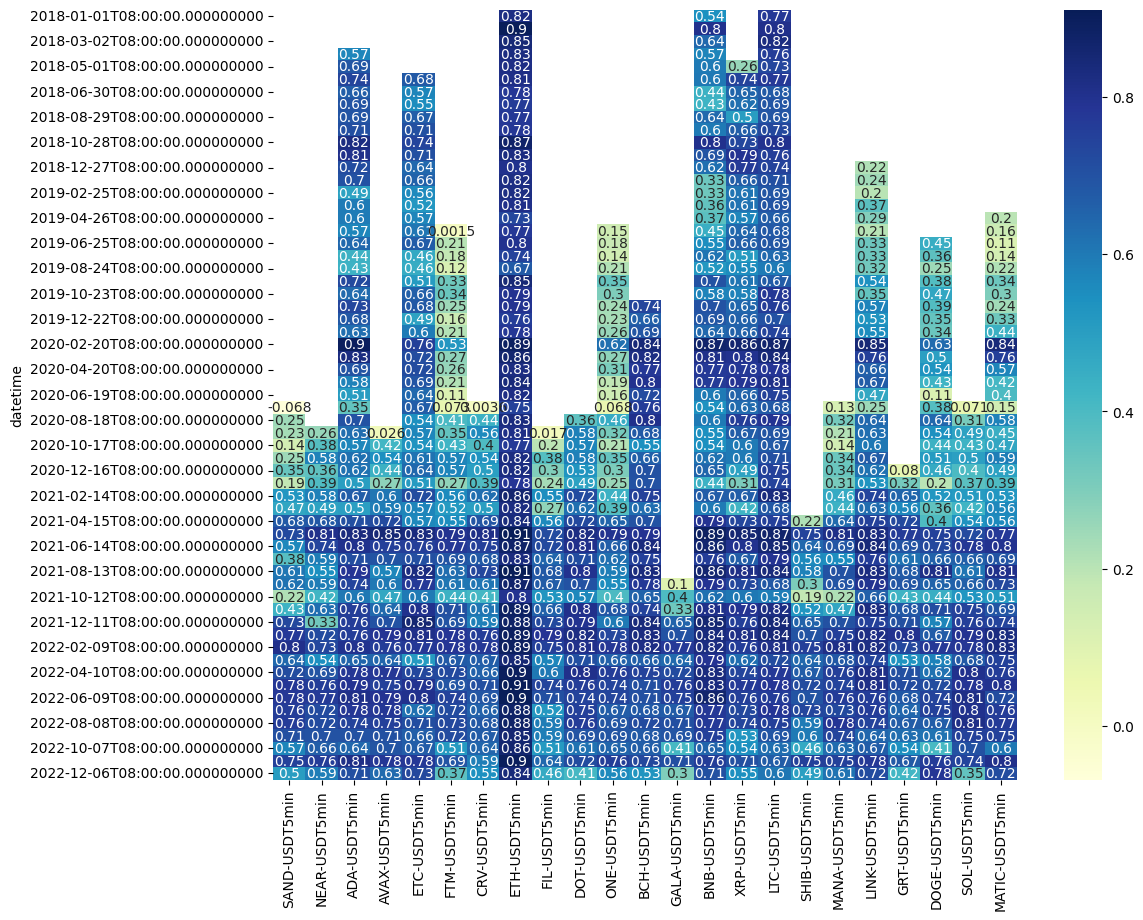

In [4]:
rdf.set_index(rdf.datetime, inplace=True)
del rdf['datetime']
del rdf['BTC-USDT5min_y']
fig = plt.figure(figsize=(12,10))
ax = sns.heatmap(rdf,cmap="YlGnBu",annot = True)
plt.show()

In [6]:
'''
Conclusion: From the heatmap we can basically tell that:
            ETH has the strongest correlation with BTC among the coins we select
            
            Because of this observation, we decide to use ETH as the test set of our models
'''

'\nConclusion: From the heatmap we can basically tell that:\n            ETH has the strongest correlation with BTC among the coins we select\n            \n            Because of this observation, we decide to use ETH as the test set of our models\n'